In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

## <a id= 'evaluate_3d2'></a> Introduction

To study the climatic data for Pakistan. I downloaded the Temperature and Precipitation data from "https://opendata.com.pk/" for the year from 1995 to 2016.
First read the both csv files and make Temperature and Weather dataframes.

In [2]:
#Open the csv files

data_Rainfall = pd.read_csv("Rainfall.csv")
data_Temperature = pd.read_csv("Temperature.csv")

In [3]:
#Rainfall dataframe and read its values

Rainfall = pd.DataFrame(data_Rainfall)
Rainfall.head()

,Year,Month,Rainfall - (MM)
0,1995,January,9.26441
1,1995,February,30.18640
2,1995,March,23.10220
3,1995,April,44.23810
4,1995,May,11.17590


In [4]:
#Temperature dataframe and read its values

Temperature = pd.DataFrame(data_Temperature)
Temperature.head()

,Year,Month,Temperature
0,1995,January,8.65067
1,1995,February,10.65880
2,1995,March,27.71860
3,1995,April,10.65880
4,1995,May,27.71860


## <a id= 'evaluate_3d2'></a> Preprocessing

During the preprocessing 
1. Combine both dataframes in one dataframe
2. Change the names of Columns
3. Check if there is null value 

In [5]:
weather = pd.concat([Rainfall, Temperature['Temperature']], axis=1, join='inner')
weather

,Year,Month,Rainfall - (MM),Temperature
0,1995,January,9.26441,8.65067
1,1995,February,30.18640,10.65880
2,1995,March,23.10220,27.71860
3,1995,April,44.23810,10.65880
4,1995,May,11.17590,27.71860
...,...,...,...,...
259,2016,August,60.60610,10.81770
260,2016,September,13.76940,12.87630
261,2016,October,1.07552,12.87630
262,2016,November,2.88480,15.76720


In [6]:
weather = weather.rename(columns={'Rainfall - (MM)': 'Rainfall-MM','Temperature': 'Temperature-Celsius', " Year": "Year"})

In [7]:
weather.isnull()

,Year,Month,Rainfall-MM,Temperature-Celsius
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
259,False,False,False,False
260,False,False,False,False
261,False,False,False,False
262,False,False,False,False


In [8]:
print('Number of no data values per column: ')
print(weather.isna().sum())

Number of no data values per column: 
Year                   0
Month                  0
Rainfall-MM            0
Temperature-Celsius    0
dtype: int64


## <a id= 'evaluate_3d2'></a> Analysis

Find the statistics of the rainfall and temperature data and correlation between temperature and precipitation. Also plot the box plot to analyze the variance in temperature and rainfall.
Analyze the data on monthly basis and yearly basis and plot the data for all four. seasons

In [9]:
weather.describe()

,Year,Rainfall-MM,Temperature-Celsius
count,264.000000,264.000000,264.000000
mean,2005.500000,25.814406,15.016457
std,6.356339,21.106613,7.032235
min,1995.000000,0.161850,6.835780
25%,2000.000000,9.960967,10.225400
50%,2005.500000,20.833100,11.375700
75%,2011.000000,34.259850,16.473250
max,2016.000000,113.186000,29.590900


In [10]:
corr = weather["Rainfall-MM"].corr(weather["Temperature-Celsius"])
corr

0.08852118789945308

In [11]:
Month = pd.DataFrame(weather.groupby(['Month']).mean())

In [12]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Month = Month.reindex(new_order, axis=0)

In [13]:
Month.drop(["Year"], axis=1, inplace=True)

In [14]:
Month

,Rainfall-MM,Temperature-Celsius
Month,,
January,20.803890,9.016451
February,30.321028,10.825478
March,32.990508,22.590118
April,26.009182,10.825478
May,15.609768,27.819150
June,23.019000,19.609556
July,54.592427,20.126138
August,56.682545,10.825478
September,23.276895,10.926274


In [15]:
Year = pd.DataFrame(weather.groupby(['Year']).mean())
Year

,Rainfall-MM,Temperature-Celsius
Year,,
1995,29.386670,16.579306
1996,28.554229,12.580954
1997,30.677396,16.107643
1998,25.076168,12.634912
1999,21.135063,17.203439
2000,15.983080,13.149614
2001,19.488182,17.295868
2002,17.455713,13.795144
2003,32.173924,16.914566


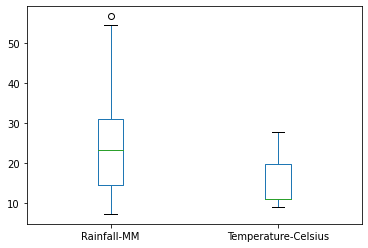

In [16]:
Month.plot.box()

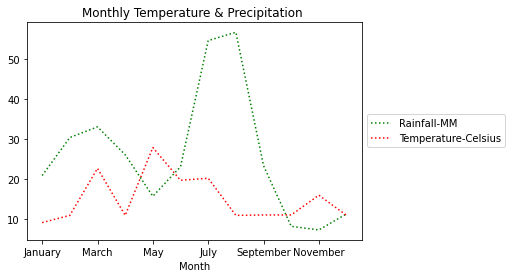

In [17]:
Month.plot(title = "Monthly Temperature & Precipitation ", linestyle='dotted',color= ["green", "red"])
plt.legend(bbox_to_anchor=(1.0, 0.6))

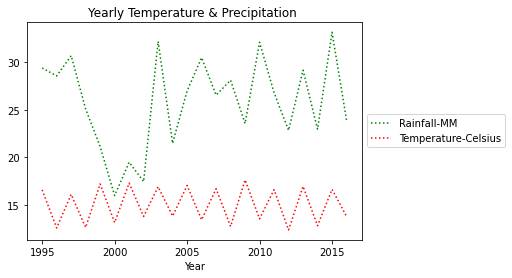

In [18]:
Year.plot(title = "Yearly Temperature & Precipitation ", linestyle='dotted',color= ["green", "red"])
plt.legend(bbox_to_anchor=(1.0, 0.6))

In [19]:
winter = Month.iloc[[0,1,11]] # Jan, Feb, Dec
spring = Month.iloc[[2,3,4]] # Mar, Apr, May
summer = Month.iloc[[5,6,7]] # Jun, Jul, Aug
autumn = Month.iloc[[8,9,10]] # Sep, Oct, Nov

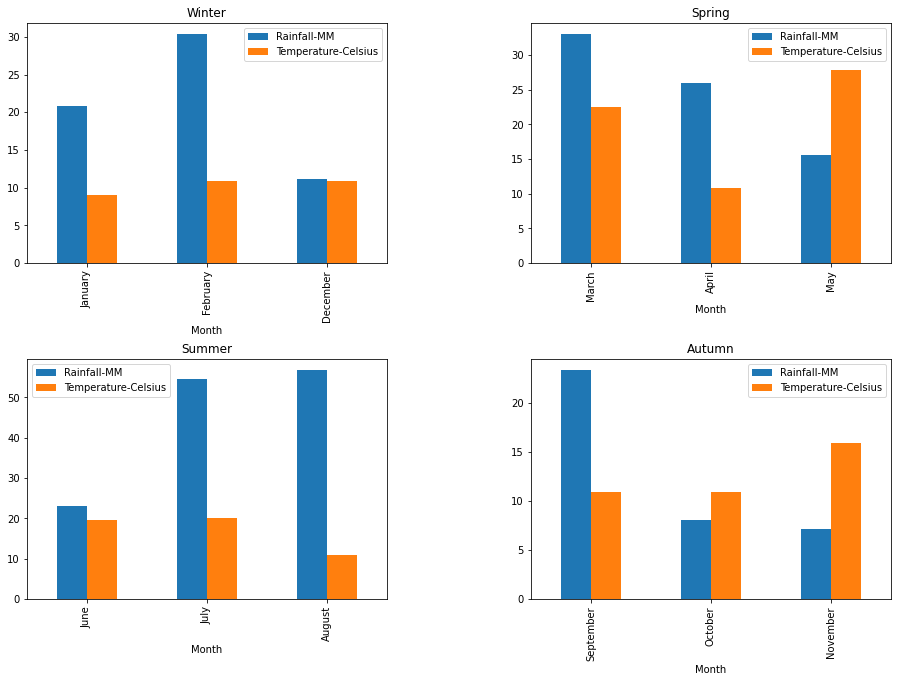

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10));

ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]


# Plot data
winter.plot.bar(ax=ax11, title = "Winter")
spring.plot.bar(ax=ax12,title = "Spring")
summer.plot.bar(ax=ax21,title = "Summer")
autumn.plot.bar(ax=ax22,title = "Autumn")


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



## <a id= 'evaluate_3d2'></a> Summary

The mean temperature and mean rainfall of Pakistan is 15 oC and 25 mm respectively from 1995 to 2016.
The maximum mean temperature is 29.0 oC and the maximum precipitation is 113 mm. The correlation between rainfall and temperature is not strong with the value of 0.08.
Monthly analysis of rainfall shows that maximum rainfall is during the months of June, July, August and September that is also the moonsoon season in Pakistan. 
Monthly analysis of temperature shows, there is some error in recording of temperature as temperature drop 
from March to April and increase very abruptly to May. In Pakistan the season of summer is from June to August whereas the winter season is from December to Faburary.
Yearly analysis of Rainfall shows that slightly rainfall increased from 1995 to 2016 that could be due to global warming. 